# 1차 EDA
데이터 자체의 분포 및 기반 정보 확인을 위한 탐색 및 EDA.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# 한글 깨짐방지
# plt.rcParams['font.family'] = 'Malgun Gothic' # For Windows
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
%matplotlib inline

# 음수 부호 깨짐 방지
import matplotlib as mpl
mpl.rc('font', family='AppleGothic')
mpl.rc('axes', unicode_minus=False) # 축의 음수 부호를 깨지지 않게 설정

In [31]:
product = pd.read_csv('/Users/t2023-m0103/Desktop/project_5/data/raw/22_생산정보.csv', encoding='cp949')

In [32]:
product.head()

,measDate,farm_cde,itemGrade,outtrn
0,2022-11-16,천지인술,1등급,NaN
1,2022-11-18,천지인술,1등급,NaN
2,2022-11-21,천지인술,1등급,NaN
3,2022-11-23,천지인술,1등급,NaN
4,2022-11-25,천지인술,1등급,NaN


In [33]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   measDate   264 non-null    object 
 1   farm_cde   264 non-null    object 
 2   itemGrade  264 non-null    object 
 3   outtrn     207 non-null    float64
dtypes: float64(1), object(3)
memory usage: 8.4+ KB


In [34]:
product['farm_cde'].unique()

array(['천지인술', 'Trigger', '이삭줍는 알파고', '토마토명가'], dtype=object)

In [36]:
product['measDate'].unique()

array(['2022-11-16', '2022-11-18', '2022-11-21', '2022-11-23',
       '2022-11-25', '2022-11-28', '2022-11-30', '2022-12-02',
       '2022-12-05', '2022-12-07', '2022-12-09'], dtype=object)

In [20]:
print(min(product['measDate']), max(product['measDate']))

2022-11-16 2022-12-09


measDate는 약 이틀의 기간을 가지고 11번(간격 10번) 측정되었음을 알려줌.

In [35]:
product['itemGrade'].unique()

array(['1등급', '2등급', '3등급', '4등급', '비상품과', '배꼽썩음과'], dtype=object)

#### 비상품과: 
상품가치가 없는 과일

#### 배꼽썩음과: 
토마토의 배꼽썩음병

#### 베꼽썩음병: 
칼슘 결핍으로 인한 균 번식. 생장하는 동안 칼슘이 부족한 어린 과실에서 나타나며 주요 원인은 석회를 너무 뿌리지 않거나 너무 뿌린 것(토양에 석회가 충분해도 칼리와 질소 성분이 지나치게 많아 길항작용에 의해 석회 흡수 억제)

# 각 농장의 등급별 수확 과중 추세

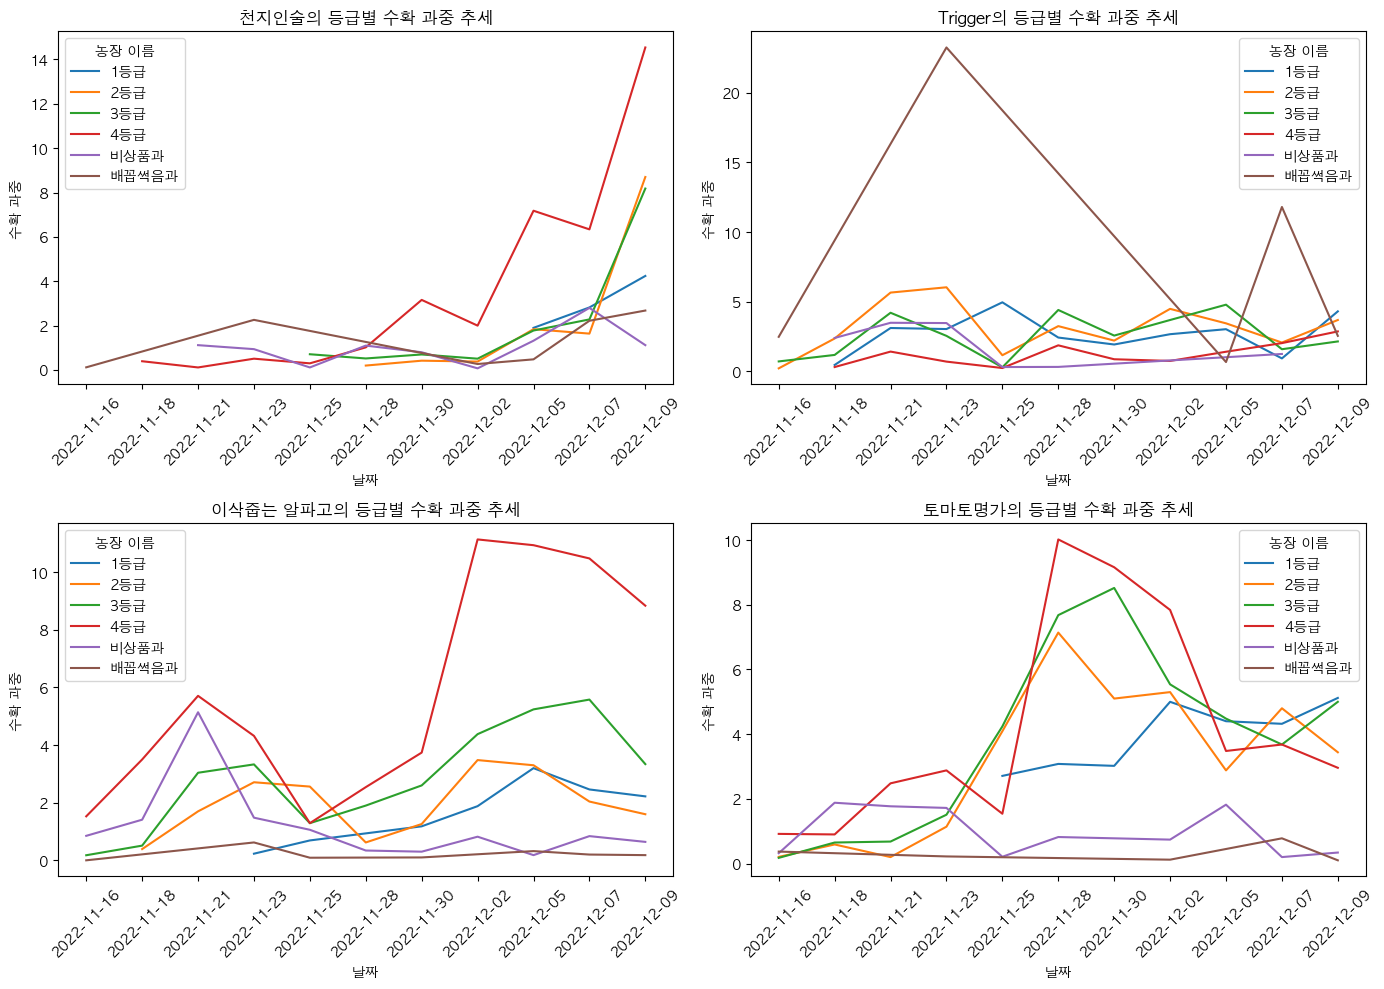

In [60]:
farms = product['farm_cde'].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, farm in zip(axes.flatten(), farms):
    sns.lineplot(
        data=product[product['farm_cde'] == farm],
        x='measDate',
        y='outtrn',
        hue='itemGrade',
        ax=ax
    )
    ax.set_title(f"{farm}의 등급별 수확 과중 추세")
    ax.set_xlabel("날짜")
    ax.set_ylabel("수확 과중")
    ax.legend(title="농장 이름")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

천지인술의 경우 4등급과가 제일 수확량이 많음.

Trigger의 경우 배꼽썩음병이 돈 것으로 보임.

이삭줍는 알파고의 경우 4등급과가 제일 수확량이 많음.

토마토명가의 경우에 1등급과가 꽤 수확량이 존재함.

# 각 농장의 수확량 총합 비교

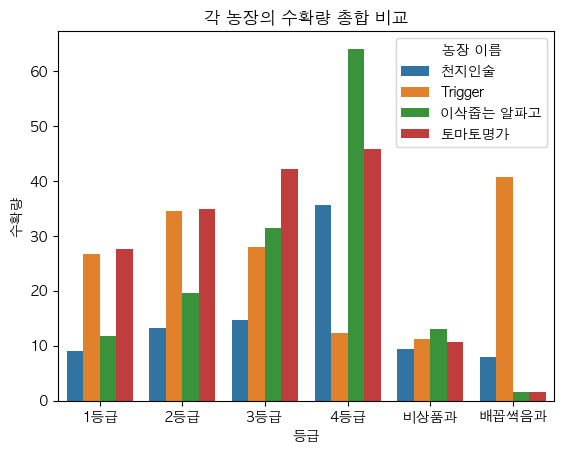

In [ ]:
sns.barplot(data=product, 
            x='itemGrade', 
            y='outtrn', 
            hue='farm_cde', 
            estimator=np.sum, 
            errorbar=None)
plt.title("각 농장의 수확량 총합 비교")
plt.xlabel("등급")
plt.ylabel("수확량")
plt.legend(title="농장 이름")
plt.show()

토마토명가가 1~4등급의 분포가 안정적이고 비상품과도 적으며 배꼽썩음과도 거의 없음.

천지인술의 경우 4등급과가 꽤 많은 편이지만 이삭줍는 알파고보다는 양호한 편. 이삭줍는 알파고는 절반 가까이 4등급과. 비상품과도 미세하게 다른 농장보다 많음.

배꼽썩음병이 돈 것이 확실한 Trigger이지만 4등급과가 적고 1~3등급과의 수가 꽤 많음.
- 4등급과의 대다수가 배꼽썩음병에 걸렸거나
- 본래 성과가 좋은 농장이었으나 석회 관리에 실패하였거나

를 예상

# 등급별 수확량 분포

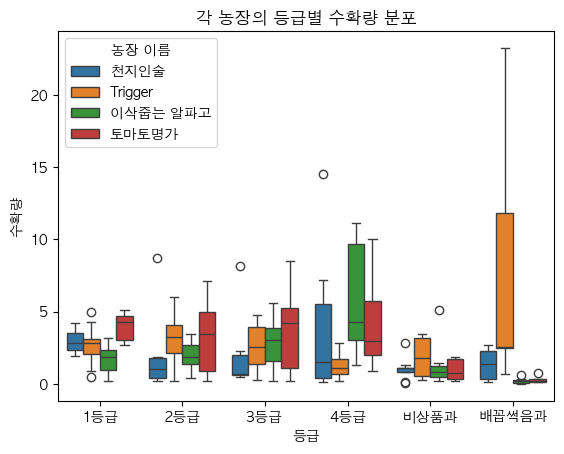

In [58]:
sns.boxplot(data=product, x='itemGrade', y='outtrn', hue='farm_cde')
plt.title("각 농장의 등급별 수확량 분포")
plt.xlabel("등급")
plt.ylabel("수확량")
plt.legend(title="농장 이름")
plt.show()

# 농가별 등급 비율

In [80]:
grade_sum = product.groupby(['farm_cde', 'itemGrade'])['outtrn'].sum().reset_index()
ratio = grade_sum.groupby(['farm_cde'])['outtrn'].apply(lambda x: x / x.sum() * 100).reset_index(name='ratio')
grade_sum = pd.concat([grade_sum, ratio['ratio']], axis=1)
grade_sum.head()


,farm_cde,itemGrade,outtrn,ratio
0,Trigger,1등급,26.775,17.434478
1,Trigger,2등급,34.486,22.455478
2,Trigger,3등급,28.034,18.254273
3,Trigger,4등급,12.370,8.054696
4,Trigger,배꼽썩음과,40.730,26.521244


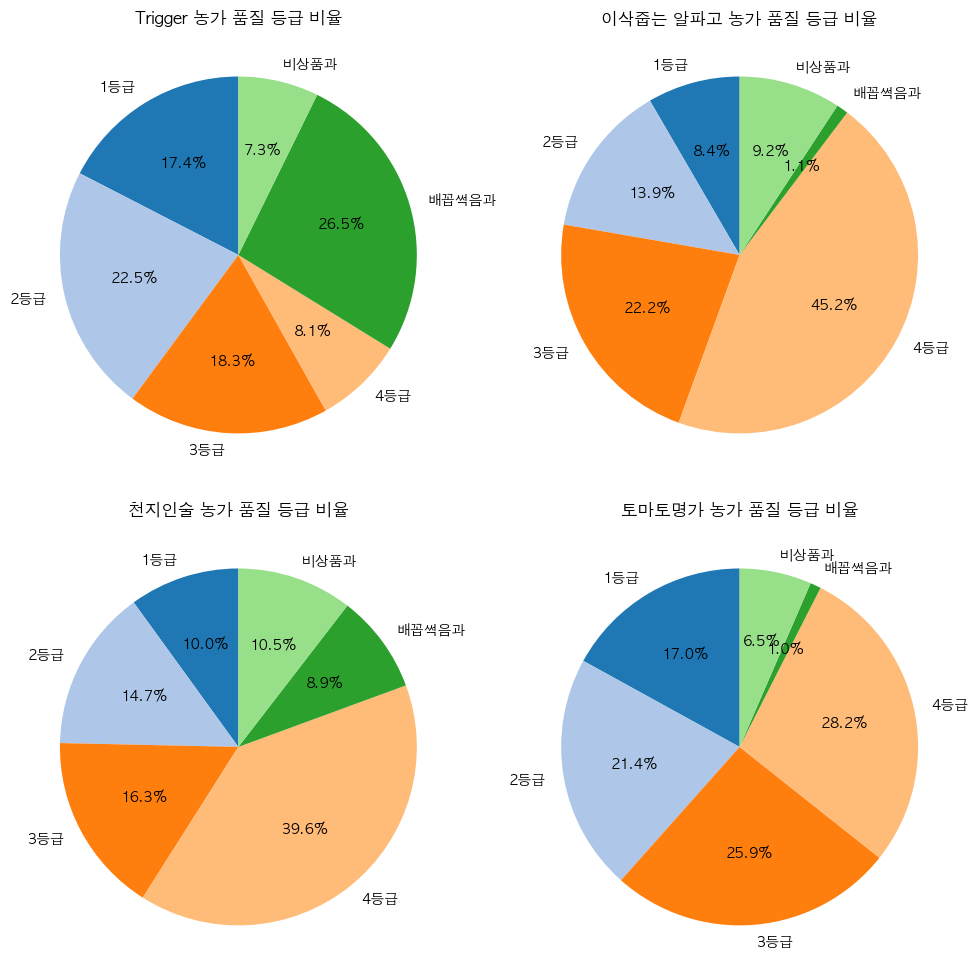

In [85]:
farms = grade_sum['farm_cde'].unique()
colors = plt.cm.tab20.colors  # 등급 색상 지정하기!

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, farm in zip(axes.flatten(), farms):
    data = grade_sum[grade_sum['farm_cde'] == farm]
    ax.pie(
        data['ratio'],
        labels=data['itemGrade'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(data)]
    )
    ax.set_title(f"{farm} 농가 품질 등급 비율")

plt.tight_layout()
plt.show()


# 환경정보

#### 내부환경 - 평균온도, 습도, 난방설정온도
#### 토양정보 - 토양PH
##### 제어정보 - CO2제어, 냉/난방기, 스프링클러, 분무: unique()

In [93]:
environment = pd.read_csv("/Users/t2023-m0103/Desktop/project_5/data/raw/22_환경정보.csv", encoding='cp949', index_col=0)

/var/folders/jz/7b91vg4d00z75sw7vt8q3c3h0000gn/T/ipykernel_1788/4090661072.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  environment = pd.read_csv("/Users/t2023-m0103/Desktop/project_5/data/raw/22_환경정보.csv", encoding='cp949', index_col=0)


In [94]:
environment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30867570 entries, 0 to 30867569
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   farm_cde   object
 1   measDate   object
 2   itemCode   int64 
 3   sectCode   object
 4   classCode  object
 5   fatrCode   object
 6   senVal     object
dtypes: int64(1), object(6)
memory usage: 1.8+ GB


In [98]:
print(min(environment['measDate'].unique()), max(environment['measDate'].unique()))

2022-09-03 14:41:45 2022-12-10 23:59:35


In [108]:
soil_ph = environment[environment['fatrCode']=='PL']
soil_ph['senVal'] = soil_ph['senVal'].astype(float)

/var/folders/jz/7b91vg4d00z75sw7vt8q3c3h0000gn/T/ipykernel_1788/3704175840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  soil_ph['senVal'] = soil_ph['senVal'].astype(float)


In [111]:
soil_ph

,farm_cde,measDate,itemCode,sectCode,classCode,fatrCode,senVal
1774486,천지인술,2022-09-26 00:00:00,80300,EL,FG,PL,5.38
1901034,천지인술,2022-09-27 00:00:00,80300,EL,FG,PL,5.15
1999543,천지인술,2022-09-28 00:00:00,80300,EL,FG,PL,5.10
2063137,천지인술,2022-09-29 00:00:00,80300,EL,FG,PL,5.08
2126774,천지인술,2022-09-30 00:00:00,80300,EL,FG,PL,6.00
...,...,...,...,...,...,...,...
30615495,토마토명가,2022-12-05 00:00:00,80300,EL,FG,PL,5.48
30678460,토마토명가,2022-12-06 00:00:00,80300,EL,FG,PL,5.30
30741552,토마토명가,2022-12-07 00:00:00,80300,EL,FG,PL,5.43
30804650,토마토명가,2022-12-08 00:00:00,80300,EL,FG,PL,5.50


<Axes: xlabel='farm_cde', ylabel='senVal'>

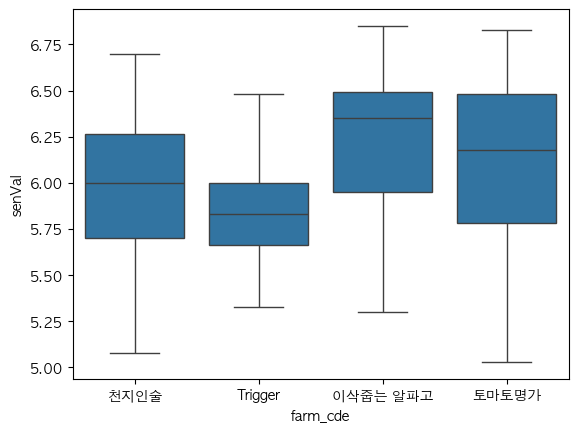

In [ ]:
sns.boxplot(data=soil_ph, x='farm_cde', y='senVal') # 토마토 수확량의 단서가 될지도?

이렇게 중요해보이는 세부 범주의 경우에는 분포 찍어봐야 할 듯함.

전체 세부 범주들에서 어떤 것이 중요하고 어떤 것이 중요하지 않은지를 먼저 골라내고(주요 범주 선정)

이후 그 범주들에 대해서 집중적으로 분석하는 것이 좋아 보임. 전부 분석하기엔 시간이 너무 걸려!!!

In [114]:
ctrl_co2 = environment[environment['fatrCode']=='CC13']
ctrl_co2['senVal'] = ctrl_co2['senVal'].astype(int)

ctrl_aircond = environment[environment['fatrCode']=='CC14']
ctrl_aircond['senVal'] = ctrl_aircond['senVal'].astype(int)

ctrl_spr = environment[environment['fatrCode']=='CC22']
ctrl_spr['senVal'] = ctrl_spr['senVal'].astype(int)

ctrl_mist = environment[environment['fatrCode']=='CC13']
ctrl_mist['senVal'] = ctrl_mist['senVal'].astype(int)

/var/folders/jz/7b91vg4d00z75sw7vt8q3c3h0000gn/T/ipykernel_1788/3142847796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_co2['senVal'] = ctrl_co2['senVal'].astype(int)
/var/folders/jz/7b91vg4d00z75sw7vt8q3c3h0000gn/T/ipykernel_1788/3142847796.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_aircond['senVal'] = ctrl_aircond['senVal'].astype(int)
/var/folders/jz/7b91vg4d00z75sw7vt8q3c3h0000gn/T/ipykernel_1788/3142847796.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of

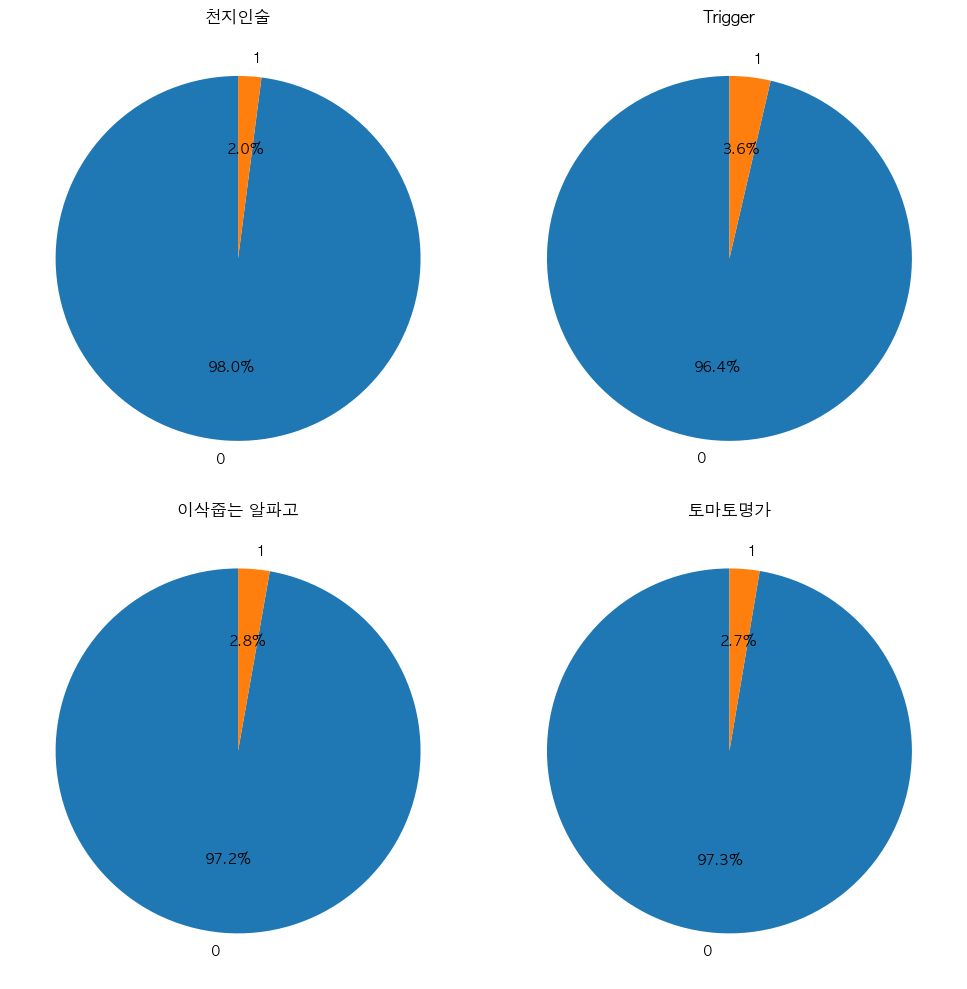

In [120]:
# dfs = [ctrl_co2, ctrl_aircond, ctrl_spr, ctrl_mist]

groups = ctrl_co2['farm_cde'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, g in enumerate(groups):
    subset = ctrl_co2[ctrl_co2['farm_cde'] == g]
    counts = subset['senVal'].value_counts(normalize=True)
    
    counts.plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        title=f"{g}"
    )
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()



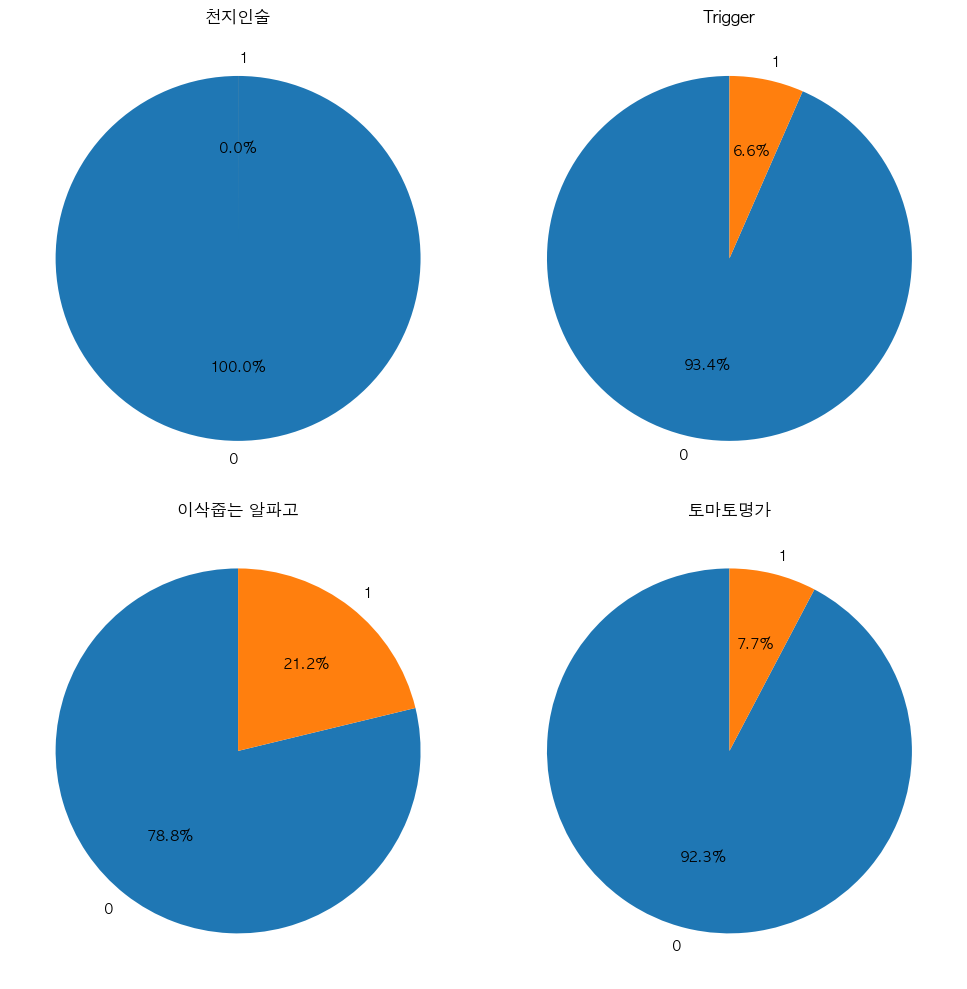

In [121]:
# dfs = [ctrl_co2, ctrl_aircond, ctrl_spr, ctrl_mist]

groups = ctrl_aircond['farm_cde'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, g in enumerate(groups):
    subset = ctrl_aircond[ctrl_aircond['farm_cde'] == g]
    counts = subset['senVal'].value_counts(normalize=True)
    
    counts.plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        title=f"{g}"
    )
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

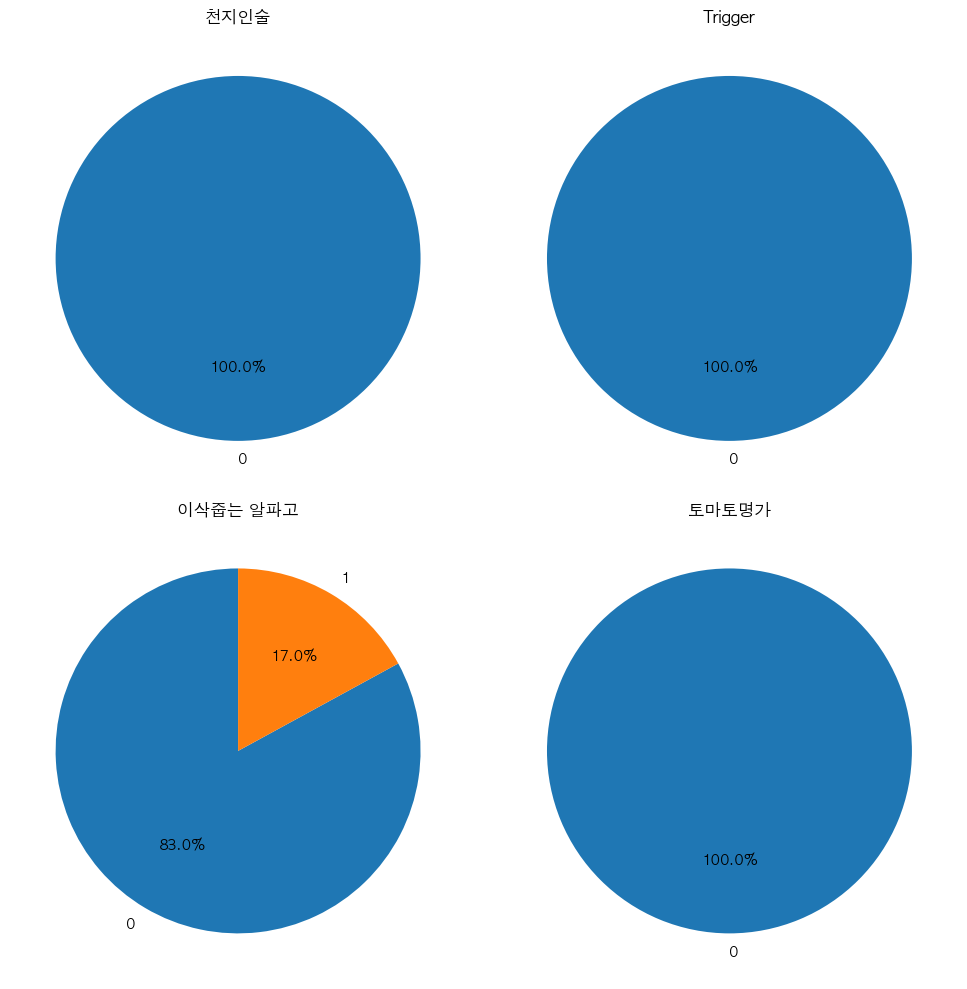

In [ ]:
# dfs = [ctrl_co2, ctrl_aircond, ctrl_spr, ctrl_mist]

groups = ctrl_spr['farm_cde'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, g in enumerate(groups):
    subset = ctrl_spr[ctrl_spr['farm_cde'] == g]
    counts = subset['senVal'].value_counts(normalize=True)
    
    counts.plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        title=f"{g}"
    )
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

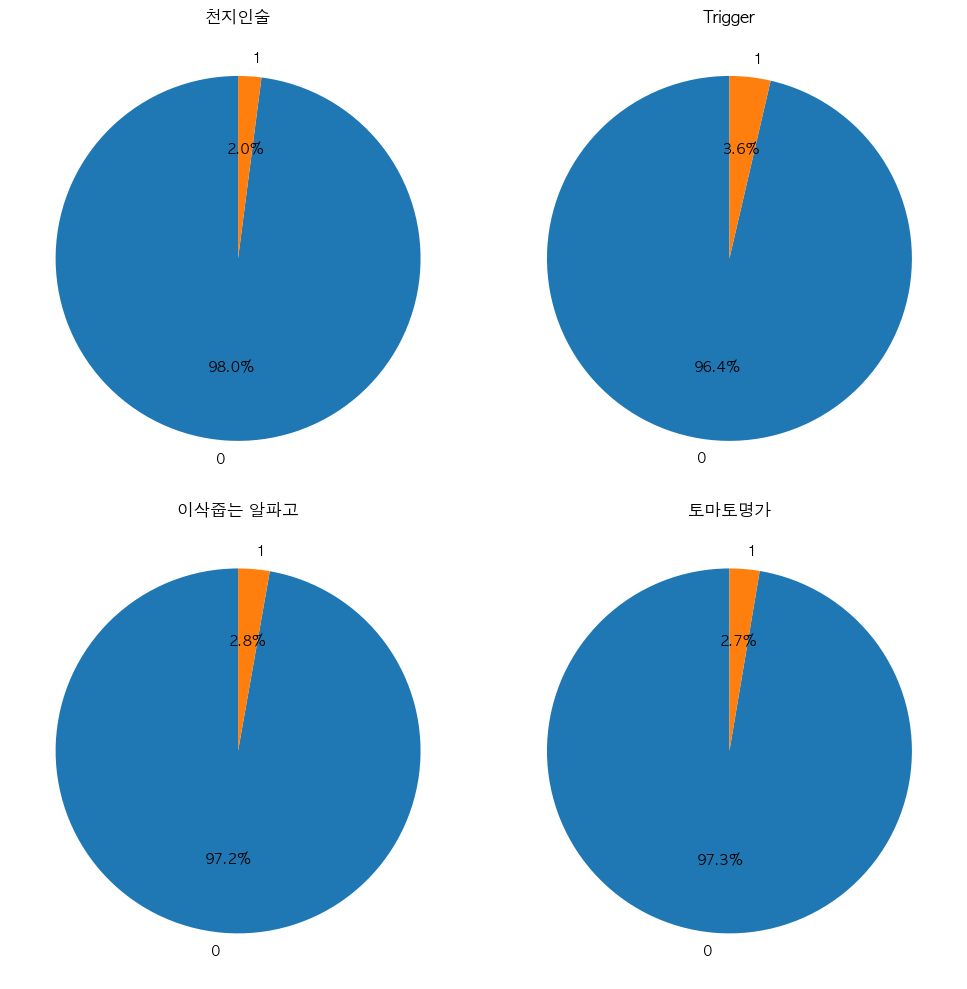

In [ ]:
# dfs = [ctrl_co2, ctrl_aircond, ctrl_spr, ctrl_mist]

groups = ctrl_mist['farm_cde'].unique()

fig, axes = plt.subplots(2, 2, figsize=(10,10))
axes = axes.flatten()

for i, g in enumerate(groups):
    subset = ctrl_mist[ctrl_mist['farm_cde'] == g]
    counts = subset['senVal'].value_counts(normalize=True)
    
    counts.plot.pie(
        ax=axes[i],
        autopct='%1.1f%%',
        startangle=90,
        title=f"{g}"
    )
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [128]:
environment.duplicated().value_counts()

False    24221663
True      6645907
Name: count, dtype: int64

In [131]:
env_df = pd.read_csv("/Users/t2023-m0103/Desktop/project_5/data/raw/2022_data/22_환경정보.csv", encoding='cp949', index_col=0)

/var/folders/jz/7b91vg4d00z75sw7vt8q3c3h0000gn/T/ipykernel_1788/1737084818.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  env_df = pd.read_csv("/Users/t2023-m0103/Desktop/project_5/data/raw/2022_data/22_환경정보.csv", encoding='cp949', index_col=0)


In [132]:
env_df.duplicated().value_counts()

False    24221663
True      6645907
Name: count, dtype: int64

In [133]:
env_df.iloc[477630]

farm_cde                    천지인술
measDate     2022-09-11 03:01:18
itemCode                   80300
sectCode                      CR
classCode                     FG
fatrCode                    CC11
senVal                       0.0
Name: 477630, dtype: object

In [134]:
env_df.iloc[477631]

farm_cde                    천지인술
measDate     2022-09-11 03:01:18
itemCode                   80300
sectCode                      CR
classCode                     FG
fatrCode                    CC11
senVal                       0.0
Name: 477631, dtype: object

In [135]:
growth_df = pd.read_csv("/Users/t2023-m0103/Desktop/project_5/data/raw/2022_data/22_생육정보.csv", encoding='cp949')

In [136]:
growth_df[growth_df['farm_cde']=='이삭줍는 알파고'].isna()

,measDate,farm_cde,itemCode,flowerTop,grwtLt,lefCunt,lefLt,lefBt,stemThck,flanGrupp,frtstGrupp,hvstGrupp,frtstCo
24,False,False,True,False,True,True,True,False,True,True,True,True,True
25,False,False,False,False,False,False,False,False,False,False,False,False,True
26,False,False,False,False,False,False,False,False,False,False,False,False,True
27,False,False,False,False,False,False,False,False,False,False,False,False,True
28,False,False,False,False,False,False,False,False,False,False,False,False,True
29,False,False,False,False,False,False,False,False,False,False,False,False,True
30,False,False,False,False,False,False,False,False,False,False,False,False,True
31,False,False,False,False,False,False,False,False,False,False,False,False,True
32,False,False,False,False,False,False,False,False,False,False,False,False,True
33,False,False,False,False,False,False,False,False,False,False,False,False,True


In [137]:
env_df.iloc[4390911]

farm_cde                    천지인술
measDate     2022-11-01 05:22:38
itemCode                   80300
sectCode                      CR
classCode                     FG
fatrCode                    CC17
senVal                         0
Name: 4390911, dtype: object

In [138]:
env_df.iloc[4390912]

farm_cde                    천지인술
measDate     2022-11-01 05:22:38
itemCode                   80300
sectCode                      CR
classCode                     FG
fatrCode                    CC17
senVal                       0.0
Name: 4390912, dtype: object

In [139]:
env_df.drop_duplicates(inplace=True)

In [140]:
env_df.shape

(24221663, 7)

In [141]:
env_df.isna().sum()

farm_cde       0
measDate       0
itemCode       0
sectCode       0
classCode      0
fatrCode       0
senVal       880
dtype: int64